In [1]:
!pip install ConfigParser
!pip install wordcloud

In [2]:
import re
import pandas as pd
import os
import tweepy as tw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [37]:
from wordcloud import WordCloud


[twitter]
accesstoken=xxxx

accesstokensecret=xxxx

apikey=xxxxxx

apisecretkey=xxxxxx

googleapikey=xxxxxxx

In [3]:
import configparser
config = configparser.RawConfigParser()
config.read('./ML Project.txt')

print(config.sections());


['twitter']


In [4]:
accesstoken=config.get('twitter', 'accesstoken')
accesstokensecret=config.get('twitter', 'accesstokensecret')
apikey=config.get('twitter', 'apikey')
apisecretkey=config.get('twitter', 'apisecretkey')

In [5]:
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
search_words = "#indiafightscorona" 
date_since = "2020-04-04"

In [7]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

In [8]:
tweets

In [9]:
tweet_details = [[ tweet.text,tweet.user.screen_name, tweet.user.location] for tweet in tweets]
#tweet_details

In [10]:
tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user', "location"])

In [11]:
pd.set_option('max_colwidth', 800)

tweet_df.head(20)

,text,user,location
0,RT @COVIDNewsByMIB: #CoronaVirusUpdates:\n\n📍India is witnessing a steady improvement in #COVID19 Recovery Rate. \n\n▶️Recovery rate exceeds 49…,PIBBengaluru,Bengaluru
1,RT @ShelarAshish: As citizens of Mumbai grapple with a health crisis of #CoronaPandemic. We have organized medical camp at Balwadi Karyalay…,wasimkhan0730,"Mumbai, India"
2,"RT @ShelarAshish: We will continue our medical camps as a duty ! Organised yet another Medical Camp for general check up, screening &amp; free…",wasimkhan0730,"Mumbai, India"
3,RT @SecySanjay: Young scientists @IITHyderabad have developed #COVID19 testing kits costing only Rs600 each and providing #AI supported res…,AjayKushwaha_,"Ghazipur UP, New Delhi, India"
4,RT @USAID_NISHTHA: Watch the video released by @MoHFW_INDIA on Hydroxychloroquine (HCQ) which is a prescription medicine &amp; is not to be us…,Meena94916780,Shillong
5,"RT @stpiindia: When you resume business during the post-#COVID19 period, cogitate on 4 parameters viz. judicious cost cutting, resizing wor…",pawanstpi,"Noida, Uttar Pradesh"
6,RT @USAID_NISHTHA: Watch the video on #COVID19 Appropriate Behaviours released by @MoHFW_INDIA on this link:\n\nhttps://t.co/SbEDnaAO7f\n\n#Swa…,Meena94916780,Shillong
7,RT @PypAyurved: It is extremely important to have good immunity in order to prevent different viruses. Drinking turmeric milk daily can imp…,Subhash36390781,"Nashik, India"
8,RT @naqvimukhtar: Delhi Jama Masjid Shahi Imam Janab Syed Ahmed Bukhari’s decision is a good circumspect decision committed to health and w…,yaserjilani,"New Delhi, India"
9,"RT @stpiindia: During post-#COVID19 period, startups should take various precautionary measures related to workplaces, scheduling of shifts…",pawanstpi,"Noida, Uttar Pradesh"


In [12]:
tweet_df.user.value_counts()

AirKadapa          4
vishyshandilya     3
InnovativeHindu    3
Sureshnair_BPCL    3
pankaj66rawat      3
                  ..
yaserjilani        1
Leopard212         1
DwarakanathKon2    1
pcmcindiagovin     1
PIBBengaluru       1
Name: user, Length: 80, dtype: int64

In [13]:
tweet_df.location.value_counts()

                                  27
Mumbai, India                      5
Pune, India                        4
Navi Mumbai, India                 3
Noida, Uttar Pradesh               3
Jodhpur                            3
Dehradun, India                    3
Bharat                             3
New Delhi                          3
Shillong                           2
Raipur                             2
Bengaluru, India                   2
New Delhi, India                   2
3/107, Geeta Colony, New Delhi     1
Ghazipur UP, New Delhi, India      1
Nashik, India                      1
Rustaq, Oman                       1
Ludhiana, India                    1
Botswana                           1
delhi                              1
Vijayawada, India                  1
Jamshedpur, India                  1
Hyderabad, India                   1
In Tammy and suriya Heart 💗        1
Nagpur, India                      1
Himachal pardesh                   1
Anantapur, India                   1
भ

In [14]:
tweet_df.dtypes

text        object
user        object
location    object
dtype: object

In [15]:
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [16]:
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

In [17]:
tweet_df.head(20)

,text,user,location
0,#CoronaVirusUpdates:📍India is witnessing a steady improvement in #COVID19 Recovery Rate. ▶️Recovery rate exceeds 49…,PIBBengaluru,Bengaluru
1,As citizens of Mumbai grapple with a health crisis of #CoronaPandemic. We have organized medical camp at Balwadi Karyalay…,wasimkhan0730,"Mumbai, India"
2,"We will continue our medical camps as a duty ! Organised yet another Medical Camp for general check up, screening &amp; free…",wasimkhan0730,"Mumbai, India"
3,Young scientists have developed #COVID19 testing kits costing only Rs600 each and providing #AI supported res…,AjayKushwaha_,"Ghazipur UP, New Delhi, India"
4,Watch the video released by on Hydroxychloroquine (HCQ) which is a prescription medicine &amp; is not to be us…,Meena94916780,Shillong
5,"When you resume business during the post-#COVID19 period, cogitate on 4 parameters viz. judicious cost cutting, resizing wor…",pawanstpi,"Noida, Uttar Pradesh"
6,Watch the video on #COVID19 Appropriate Behaviours released by on this link:#Swa…,Meena94916780,Shillong
7,It is extremely important to have good immunity in order to prevent different viruses. Drinking turmeric milk daily can imp…,Subhash36390781,"Nashik, India"
8,Delhi Jama Masjid Shahi Imam Janab Syed Ahmed Bukhari’s decision is a good circumspect decision committed to health and w…,yaserjilani,"New Delhi, India"
9,"During post-#COVID19 period, startups should take various precautionary measures related to workplaces, scheduling of shifts…",pawanstpi,"Noida, Uttar Pradesh"


In [18]:
tweet_df.to_csv('tweets.csv')

#to know what people are talking about
!pip install spacy
import spacy 
  
nlp = spacy.load('en_core_web_sm') 

tweet_df['text'].apply(lambda x: [print("\tText : {}, Entity : {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else ""  for ent in nlp(x).ents])

tweet_df['entities']=tweet_df['text'].apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\VEDITA
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))


In [21]:
#Tokenization-dividing the tweet into seperate phrases
tokenized_tweet=tweet_df['text'].apply(lambda x:x.split())
tokenized_tweet.head(3)

0                     [#CoronaVirusUpdates:📍India, is, witnessing, a, steady, improvement, in, #COVID19, Recovery, Rate., ▶️Recovery, rate, exceeds, 49…]
1          [As, citizens, of, Mumbai, grapple, with, a, health, crisis, of, #CoronaPandemic., We, have, organized, medical, camp, at, Balwadi, Karyalay…]
2    [We, will, continue, our, medical, camps, as, a, duty, !, Organised, yet, another, Medical, Camp, for, general, check, up,, screening, &amp;, free…]
Name: text, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweet_df['text'] = tokenized_tweet

In [25]:
def word_count(sentence):
    return len(sentence.split())
    


In [27]:
sid = SentimentIntensityAnalyzer()

In [28]:
tweet_df['sentiment']=tweet_df['text'].apply(lambda x: sid.polarity_scores(x))


In [ ]:
!pip install TextBlob

In [29]:
from textblob import TextBlob
tweet_df['polarity_score']=tweet_df['text'].apply(lambda text:TextBlob(text).sentiment.polarity )

In [30]:
tweet_df.head(10)

,text,user,location,word count,sentiment,polarity_score
0,#CoronaVirusUpdates:📍India is witnessing a steady improvement in #COVID19 Recovery Rate. ▶️Recovery rate exceeds 49…,PIBBengaluru,Bengaluru,14,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}",0.166667
1,As citizens of Mumbai grapple with a health crisis of #CoronaPandemic. We have organized medical camp at Balwadi Karyalay…,wasimkhan0730,"Mumbai, India",19,"{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.6249}",0.000000
2,"We will continue our medical camps as a duty ! Organised yet another Medical Camp for general check up, screening &amp; free…",wasimkhan0730,"Mumbai, India",22,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.016667
3,Young scientists have developed #COVID19 testing kits costing only Rs600 each and providing #AI supported res…,AjayKushwaha_,"Ghazipur UP, New Delhi, India",16,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}",0.066667
4,Watch the video released by on Hydroxychloroquine (HCQ) which is a prescription medicine &amp; is not to be us…,Meena94916780,Shillong,19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000
5,"When you resume business during the post-#COVID19 period, cogitate on 4 parameters viz. judicious cost cutting, resizing wor…",pawanstpi,"Noida, Uttar Pradesh",18,"{'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.128}",-0.600000
6,Watch the video on #COVID19 Appropriate Behaviours released by on this link:#Swa…,Meena94916780,Shillong,12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.500000
7,It is extremely important to have good immunity in order to prevent different viruses. Drinking turmeric milk daily can imp…,Subhash36390781,"Nashik, India",20,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.624}",0.275000
8,Delhi Jama Masjid Shahi Imam Janab Syed Ahmed Bukhari’s decision is a good circumspect decision committed to health and w…,yaserjilani,"New Delhi, India",20,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6124}",0.700000
9,"During post-#COVID19 period, startups should take various precautionary measures related to workplaces, scheduling of shifts…",pawanstpi,"Noida, Uttar Pradesh",15,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000


In [31]:
tweet_df['polarity']=tweet_df['polarity_score'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))

In [32]:
tweet_df['label']=tweet_df['polarity'].apply(lambda x:1 if x=="positive" else(-1 if x=="negative" else 0))

In [33]:
positives = tweet_df['label'][tweet_df.label == 1]
negatives = tweet_df['label'][tweet_df.label == -1]

print('number of positve tagged sentences is:' +str(len(positives)))
print('number of negative tagged sentences is:' +str(len(negatives)))

number of positve tagged sentences is:52
number of negative tagged sentences is:4


In [34]:
tweet_df

,text,user,location,word count,sentiment,polarity_score,polarity,label
0,#CoronaVirusUpdates:📍India is witnessing a steady improvement in #COVID19 Recovery Rate. ▶️Recovery rate exceeds 49…,PIBBengaluru,Bengaluru,14,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}",0.166667,positive,1
1,As citizens of Mumbai grapple with a health crisis of #CoronaPandemic. We have organized medical camp at Balwadi Karyalay…,wasimkhan0730,"Mumbai, India",19,"{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.6249}",0.000000,neutral,0
2,"We will continue our medical camps as a duty ! Organised yet another Medical Camp for general check up, screening &amp; free…",wasimkhan0730,"Mumbai, India",22,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.016667,positive,1
3,Young scientists have developed #COVID19 testing kits costing only Rs600 each and providing #AI supported res…,AjayKushwaha_,"Ghazipur UP, New Delhi, India",16,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}",0.066667,positive,1
4,Watch the video released by on Hydroxychloroquine (HCQ) which is a prescription medicine &amp; is not to be us…,Meena94916780,Shillong,19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,neutral,0
...,...,...,...,...,...,...,...,...
95,Delhi Jama Masjid Shahi Imam Janab Syed Ahmed Bukhari’s decision is a good circumspect decision committed to health and w…,KumarVi41658497,"Jamshedpur, India",20,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6124}",0.700000,positive,1
96,#IndiaFightsCorona: #IndianRailways geared up to provide COVID Care Centers to State Authorities. Trains with unit co…,NAAGPURKAR,"Mumbai, India",16,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4939}",0.000000,neutral,0
97,Standard Operating Procedure to contain the spread of COVID-19 in Shopping Malls. #IndiaFightsCorona,shyamalaskundar,Jasola New Delhi,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,neutral,0
98,"#COVIDKATHAwithMyGov: Y for Yoga is essential for everyone to manage stress and stay fit. During this pandemic, it is advis…",BandaFob,,20,"{'neg': 0.126, 'neu': 0.762, 'pos': 0.112, 'compound': -0.0772}",0.200000,positive,1


In [38]:
all_words = []
for line in (tweet_df['text']): # try 'tokens'
    all_words.extend(line)
    
wordfreq = Counter(all_words)
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17, 14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'Counter' is not defined

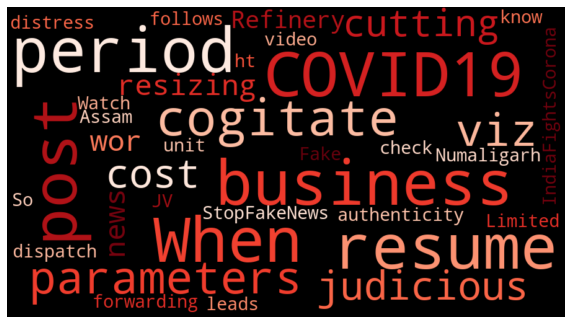

In [42]:
#negative words

neg_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == -1]])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

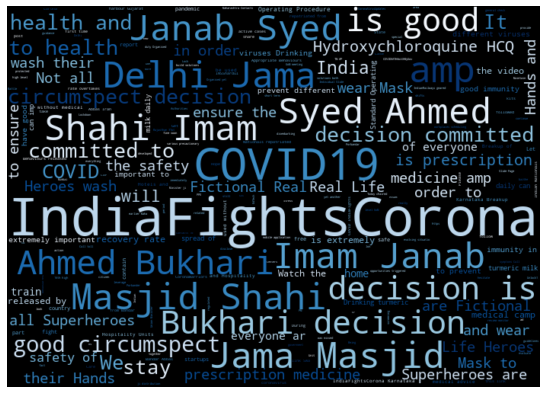

In [48]:
#positive words

pos_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] >= 0]])

wordcloud = WordCloud(width=700,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

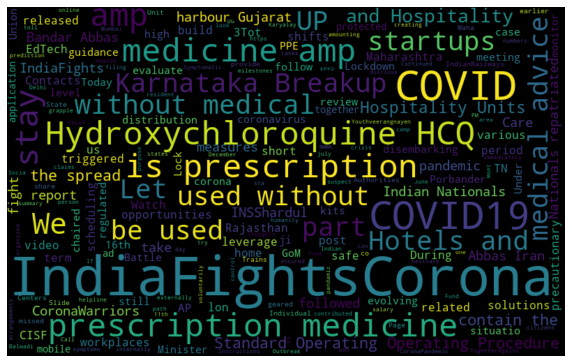

In [45]:
#neutral words

normal_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

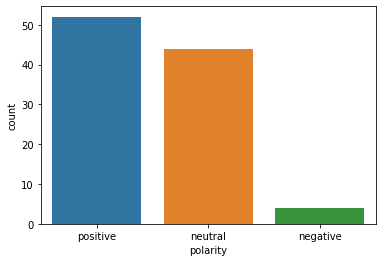

In [50]:
sns.countplot(x='polarity',data=tweet_df)

In [51]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [52]:
HT_regular = hashtag_extract(tweet_df['text'][tweet_df['label'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(tweet_df['text'][tweet_df['label'] == -1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

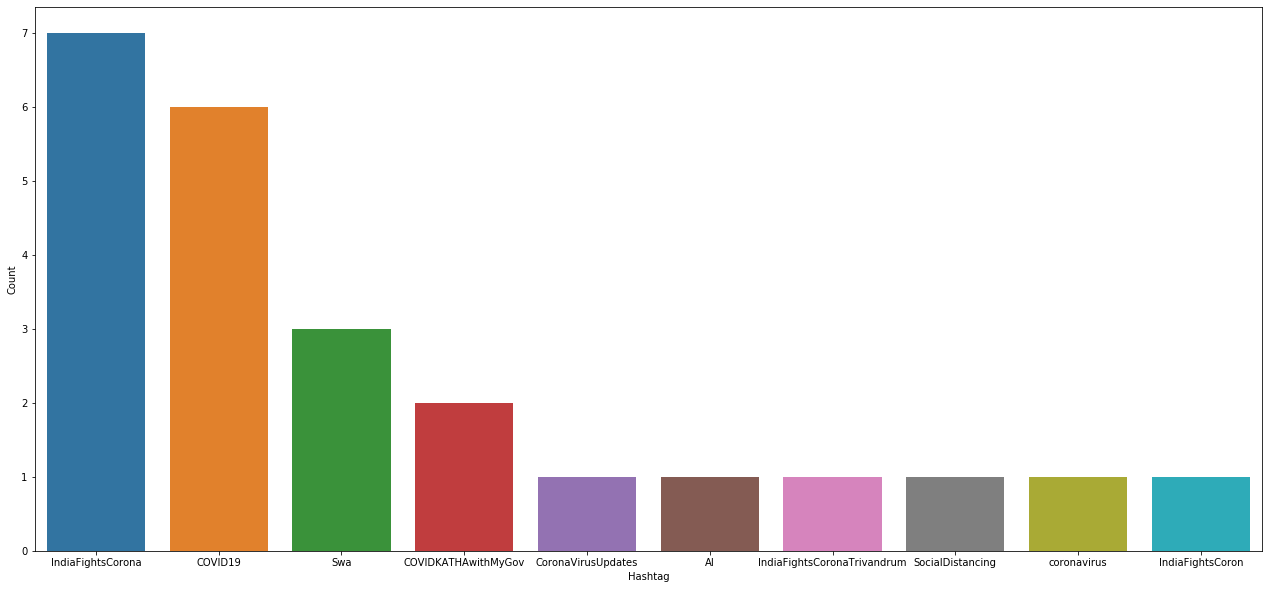

In [53]:
#positive hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(22,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

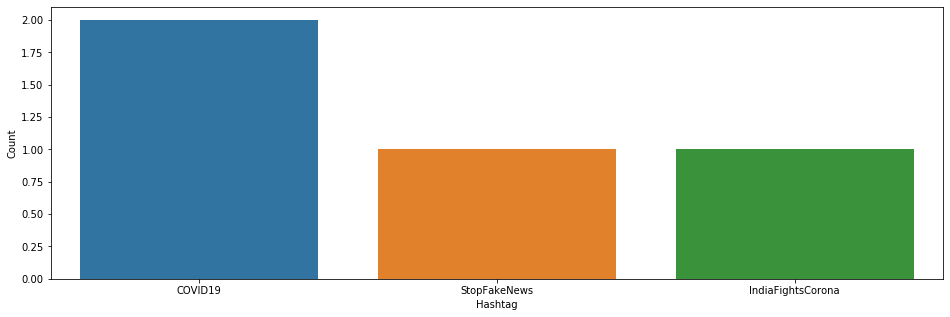

In [54]:
#negative hastags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()